https://seoyeonc.github.io/chch/cnn/feature%20extraction/big%20data%20analysis/2022/01/11/bd_9주차.html

https://seoyeonc.github.io/chch/cam/2022/01/10/bd-8주차_1.html

# import

In [1]:
import torch 
from fastai.vision.all import *

In [2]:
path=untar_data(URLs.PETS)/'images'

In [3]:
path

Path('/home/csy/.fastai/data/oxford-iiit-pet/images')

In [4]:
files=get_image_files(path)

In [5]:
def label_func(f):
    if f[0].isupper():
        return 'cat' 
    else: 
        return 'dog' 

In [6]:
dls=ImageDataLoaders.from_name_func(path,files,label_func,item_tfms=Resize(512)) 

In [ ]:
lrnr=cnn_learner(dls,resnet34,metrics=error_rate) # 34-> 작을수록 간단한 모형
lrnr.fine_tune(1)

/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time


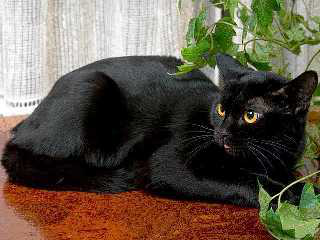

In [8]:
img = PILImage.create(get_image_files(path)[0])
img 

In [9]:
x, = first(dls.test_dl([img])) # tensor화 시키기, MNIST랑 본질은 비슷!

In [10]:
net1=lrnr.model[0]
net2=lrnr.model[1]  # 0은 유지하고 1만 바꿀 거


In [11]:
net2 = torch.nn.Sequential(
    torch.nn.AdaptiveAvgPool2d(output_size=1),  # 512의 output을 1로
    torch.nn.Flatten(),
    torch.nn.Linear(512,out_features=2,bias=False)) # output 을 2로
